# Import package

In [108]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# copy the url of the website

In [2]:
url="https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&"

In [3]:
for i in range(1,11):
    print(f"https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&page={i}")

https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&page=1
https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&page=2
https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&page=3
https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&page=4
https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&page=5
https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_Organic

# present the content in html

In [6]:
page=requests.get(url)
page

<Response [429]>

In [7]:
soup=BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html><head><title>Online Shopping India Mobile, Cameras, Lifestyle &amp; more Online @ Flipkart.com</title><meta content="IE=edge" http-equiv="X-UA-Compatible"/><style>html,
        body {
            font-family: Roboto, arial, tahoma, verdana, sans-serif;
            height: 100%;
            margin: 0;
        }

        .btn {
            border-radius: 4px;
            margin-top: 16px;
            display: inline-block;
            color: #fff;
            font-family: inter_semi_bold, Arial, sans-serif;
            border: none;
            font-size: inherit;
            cursor: pointer;
            width: 328px;
            height: 40px;
        }

        .disable_btn {
            background-color: #808080;
            cursor: not-allowed;
        }

        #retry_btn {
            background-color: #2A55E5;
            display: none;
        }</style></head><body><div style="background-color:#2874f0;height:78px;text-align:center;"><div style="width: 978px;

In [13]:
brand = []
liter_storage = []
star = []
cool_type=[]
Ratings = []
Price=[]
for i in range(1,50):
    url = f"https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_9_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_9_na_na_na&page={i}"
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    # For brand_name
    for i in soup.find_all("div",class_="_4rR01T"):
        print(i.text)
        regex=re.findall("^[a-zA-Z]+",i.text)
        print(regex)
        if regex:
            brand.append(regex[0])
        else:
            brand.append(np.nan)

    # For liter storage
    for i in soup.find_all("div",class_="_4rR01T"):
        print(i.text)
        regex=re.findall("(\d+)\sL",i.text)
        print(regex)
        if regex:
            liter_storage.append(regex[0])
        else:
            liter_storage.append(np.nan)

    # For star
    for i in soup.find_all("div",class_="_4rR01T"):
        print(i.text)
        regex=re.findall("(\d+)\sStar",i.text)
        print(regex)
        if regex:
            star.append(regex[0])
        else:
            star.append(np.nan)

    # For cool_type
    for i in soup.find_all("div",class_="_4rR01T"):
        print(i.text)
        regex=re.findall(r"Direct Cool|Frost Free",i.text)
        print(regex)
        if regex:
            cool_type.append(regex[0])
        else:
            cool_type.append(np.nan)
    #For Rating
    for i in soup.find_all("div",class_="_2kHMtA"):
        rat =i.find("div",class_="_3LWZlK")
        if rat:
            Ratings.append(rat)
        else:
            Ratings.append(np.nan)
    
    #For price
    for i in soup.find_all("div",class_="_30jeq3 _1_WHN1"):
        if re.findall("(\d.+)",i.text):
            price=re.findall("(\d.+)",i.text)
        if Price:
            Price.append(price[0])
        else:
            Price.append(np.nan)

Whirlpool 184 L Direct Cool Single Door 2 Star Refrigerator
['Whirlpool']
Whirlpool 184 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer  with Intellisense Invert...
['Whirlpool']
Liebherr 240 L Frost Free Double Door 2 Star Refrigerator
['Liebherr']
Liebherr 264 L Frost Free Double Door 2 Star Refrigerator
['Liebherr']
SAMSUNG 236 L Frost Free Double Door 2 Star Convertible Refrigerator  with Digital Inverter with Displ...
['SAMSUNG']
SAMSUNG 189 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer  with Digital Inverter
['SAMSUNG']
Liebherr 310 L Frost Free Double Door 2 Star Refrigerator
['Liebherr']
Whirlpool 184 L Direct Cool Single Door 2 Star Refrigerator
['Whirlpool']
Haier 190 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer
['Haier']
Voltas Beko by A Tata Product 183 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer
['Voltas']
SAMSUNG 653 L Frost Free Side by Side 3 Star Refrigerator  with Convertible 5-in-1 Digital Inverter 

In [14]:
print(len(brand),len(liter_storage),len(cool_type),len(star),len(Ratings),len(Price))

648 648 648 648 648 648


In [15]:
fridge={"Brand":brand,"Liter_storage":liter_storage,"Cool_type":cool_type,"Star":star,"Ratings":Ratings,"Price":Price}

In [16]:
import pandas  as pd

In [17]:
data=pd.DataFrame(fridge)

In [18]:
data

,Brand,Liter_storage,Cool_type,Star,Ratings,Price
0,Whirlpool,184,Direct Cool,2,"[4.3, []]",NaN
1,Whirlpool,184,Direct Cool,4,"[4.3, []]","16,090"
2,Liebherr,240,Frost Free,2,NaN,"25,490"
3,Liebherr,264,Frost Free,2,NaN,"31,990"
4,SAMSUNG,236,Frost Free,2,"[4.4, []]","24,690"
...,...,...,...,...,...,...
643,SAMSUNG,700,Frost Free,NaN,"[3.7, []]","95,990"
644,Liebherr,240,Frost Free,2,NaN,"29,490"
645,Liebherr,240,Frost Free,2,NaN,"28,990"
646,SAMSUNG,256,Frost Free,2,"[4.1, []]","32,990"


In [19]:
df=data.copy()

# finding  the column name

In [20]:
df.columns

Index(['Brand', 'Liter_storage', 'Cool_type', 'Star', 'Ratings', 'Price'], dtype='object')

# Duplicate Values1

In [21]:
df.duplicated().sum()

204

In [22]:
df.drop_duplicates(keep="first",inplace=True)

In [23]:
df.duplicated().sum()

0

# finding corrupted data

In [24]:
df["Brand"].unique() # there is no corrupted data

array(['Whirlpool', 'Liebherr', 'SAMSUNG', 'Haier', 'Voltas', 'LG',
       'Godrej', 'MarQ', 'realme', 'Lloyd', 'CANDY', 'ONIDA', 'Hisense',
       'Panasonic', 'Midea', 'Lifelong', 'BOSCH', 'Kelvinator', 'Hitachi',
       'Electrolux', 'BPL'], dtype=object)

In [25]:
df["Liter_storage"].unique() # there is no corrupted data

array(['184', '240', '264', '236', '189', '310', '190', '183', '653',
       '185', '180', '242', '223', '215', '260', '205', '560', '420',
       '253', '288', '175', '265', '280', '237', '234', '192', '330',
       '200', '231', '246', '322', '225', '308', '358', '294', '564',
       '224', '198', '30', '201', '570', '328', '173', '228', '630',
       '346', '687', '207', '343', '500', '335', '363', '248', '340',
       '360', '580', '261', '272', '305', '235', '584', '307', '587',
       '412', '304', '460', '655', '688', '188', '336', '296', '210',
       '333', '482', '268', '325', '347', '259', '178', '670', '263',
       '676', '592', '565', '516', '398', '432', '95', '301', '220',
       '204', '628', '233', '551', nan, '445', '291', '324', '195', '390',
       '408', '446', '674', '635', '598', '694', '702', '274', '431',
       '256', '380', '465', '221', '467', '559', '385', '394', '244',
       '290', '430', '440', '197', '403', '472', '44', '45', '275', '705',
       '350'

In [26]:
df["Cool_type"].unique() # there is no corrupted data

array(['Direct Cool', 'Frost Free', nan], dtype=object)

In [27]:
df["Star"].unique()  # there is no corrupted data

array(['2', '4', '5', '3', nan, '1'], dtype=object)

In [191]:
df["Price"].unique() # there is no corrupted data

array([nan, '10,290', '25,990', '16,690', '17,990', '13,990', '22,990',
       '17,890', '47,990', '26,990', '12,640', '23,290', '34,890',
       '35,490', '24,990', '49,990', '27,190', '26,490', '17,590',
       '32,990', '16,090', '20,740', '13,590', '15,090', '86,990',
       '25,790', '19,990', '24,690', '17,290', '12,390', '16,290',
       '25,490', '37,990', '12,790', '27,490', '13,840', '18,690',
       '43,990', '14,090', '28,990', '23,990', '22,390', '16,590',
       '18,990', '8,990', '35,990', '29,690', '24,290', '35,290',
       '19,490', '15,890', '12,490', '54,990', '15,690', '24,498',
       '38,490', '23,490', '18,290', '60,999', '34,990', '27,999',
       '20,990', '18,190', '7,790', '14,490', '71,990', '15,390',
       '25,590', '21,490', '37,490', '16,490', '30,990', '15,990',
       '15,190', '15,790', '34,490', '14,010', '65,990', '22,490',
       '42,990', '26,600', '28,175', '51,990', '27,990', '28,240',
       '39,990', '17,090', '53,990', '16,390', '15,290', '1

In [100]:
import re
x=df["Ratings"]
str1=str(x)
pattern="(\d+\.\d+)"
y=re.findall(pattern,str1)# there is no corrupted data
print(y)

['4.3', '4.3', '4.4', '3.8', '3.7', '4.1', '4.4']


# Finding Missing Values

In [30]:
df.isna().sum()

Brand             0
Liter_storage     2
Cool_type         1
Star             45
Ratings          85
Price             1
dtype: int64

# Treating Missing Values

In [31]:
df.describe()

,Brand,Liter_storage,Cool_type,Star,Ratings,Price
count,444,442,443,399,359,443
unique,21,143,2,5,20,291
top,SAMSUNG,190,Frost Free,3,"[4.3, []]","19,490"
freq,108,25,222,142,110,12


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 647
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          444 non-null    object
 1   Liter_storage  442 non-null    object
 2   Cool_type      443 non-null    object
 3   Star           399 non-null    object
 4   Ratings        359 non-null    object
 5   Price          443 non-null    object
dtypes: object(6)
memory usage: 24.3+ KB


In [33]:
df["Liter_storage"].fillna("0",inplace=True)

In [34]:
df["Star"].fillna("0",inplace=True)

In [40]:
df["Cool_type"].mode()

0    Frost Free
Name: Cool_type, dtype: object

In [42]:
df["Cool_type"].fillna("Frost Free",inplace=True)

In [36]:
df["Ratings"].fillna("0",inplace=True)

In [37]:
df["Price"].fillna("0",inplace=True)

In [44]:
df.isna().sum()

Brand            0
Liter_storage    0
Cool_type        0
Star             0
Ratings          0
Price            0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 647
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          444 non-null    object
 1   Liter_storage  444 non-null    object
 2   Cool_type      444 non-null    object
 3   Star           444 non-null    object
 4   Ratings        444 non-null    object
 5   Price          444 non-null    object
dtypes: object(6)
memory usage: 24.3+ KB


# Type conversion

In [46]:
df.dtypes

Brand            object
Liter_storage    object
Cool_type        object
Star             object
Ratings          object
Price            object
dtype: object

In [47]:
df["Star"]=df["Star"].astype(int)


In [48]:
df["Price"]=df["Price"].str.replace(",","").astype(int)

In [49]:
df["Liter_storage"]=df["Liter_storage"].astype(int)

In [50]:
df.dtypes

Brand            object
Liter_storage     int32
Cool_type        object
Star              int32
Ratings          object
Price             int32
dtype: object

In [51]:
df.head()

,Brand,Liter_storage,Cool_type,Star,Ratings,Price
0,Whirlpool,184,Direct Cool,2,"[4.3, []]",0
1,Whirlpool,184,Direct Cool,4,"[4.3, []]",16090
2,Liebherr,240,Frost Free,2,0,25490
3,Liebherr,264,Frost Free,2,0,31990
4,SAMSUNG,236,Frost Free,2,"[4.4, []]",24690


In [241]:
df.groupby("Brand").agg({"Price":sum})

,Price
Brand,
BOSCH,202280
CANDY,120990
Electrolux,328960
Godrej,599855
Haier,1203049
Hisense,53990
Hyundai,10100
Kelvinator,100896
LG,3026499


Text(0, 0.5, 'Price')

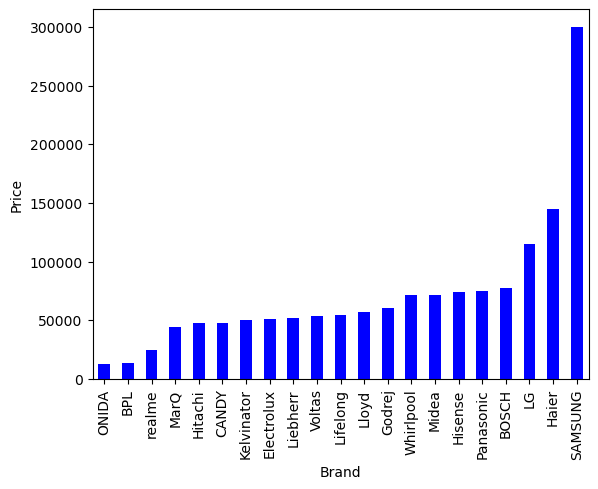

In [109]:
df.groupby(by="Brand")["Price"].max().sort_values().plot(kind="bar",color="blue")
plt.ylabel("Price")

Text(0, 0.5, 'Liter_storage')

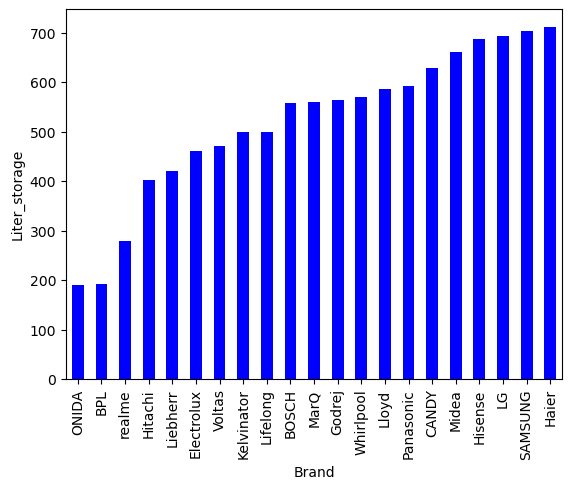

In [112]:
df.groupby(by="Brand")["Liter_storage"].max().sort_values().plot(kind="bar",color="blue")
plt.ylabel("Liter_storage")

In [67]:
df.head()

,Brand,Liter_storage,Cool_type,Star,Ratings,Price
0,Whirlpool,184,Direct Cool,2,"[4.3, []]",0
1,Whirlpool,184,Direct Cool,4,"[4.3, []]",16090
2,Liebherr,240,Frost Free,2,0,25490
3,Liebherr,264,Frost Free,2,0,31990
4,SAMSUNG,236,Frost Free,2,"[4.4, []]",24690


In [68]:
df["Price"].max()

299990

In [69]:
df["Price"].min()

0

In [70]:
df.groupby("Brand").agg({"Price":max})

,Price
Brand,
BOSCH,77579
BPL,13819
CANDY,47990
Electrolux,50990
Godrej,60999
Haier,144888
Hisense,73990
Hitachi,47828
Kelvinator,49989


In [71]:
df.groupby("Brand").agg({"Price":min})

,Price
Brand,
BOSCH,29990
BPL,13819
CANDY,13990
Electrolux,50990
Godrej,7790
Haier,12790
Hisense,9190
Hitachi,47828
Kelvinator,9890


In [72]:
df.groupby("Brand").agg({"Liter_storage":max})

,Liter_storage
Brand,
BOSCH,559
BPL,193
CANDY,630
Electrolux,461
Godrej,564
Haier,712
Hisense,688
Hitachi,403
Kelvinator,500


In [248]:
df["Brand"].mode()# most purchased fridge

0    SAMSUNG
Name: Brand, dtype: object

In [249]:
df["Brand"].value_counts()#samsung bought so many times

SAMSUNG       95
LG            78
Whirlpool     73
Haier         44
Godrej        28
Voltas        13
Panasonic     11
Lloyd         11
CANDY          7
Liebherr       6
Kelvinator     5
Midea          5
realme         4
Electrolux     4
BOSCH          4
ONIDA          2
Lifelong       2
MarQ           2
Hisense        1
Hyundai        1
Name: Brand, dtype: int64

# uniVariate Analysis

<Axes: ylabel='Frequency'>

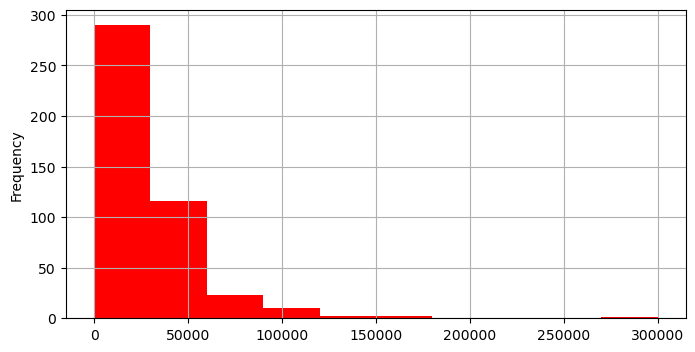

In [116]:
 df["Price"].plot(kind="hist",color="red",grid=True,figsize=(8,4))

<Axes: >

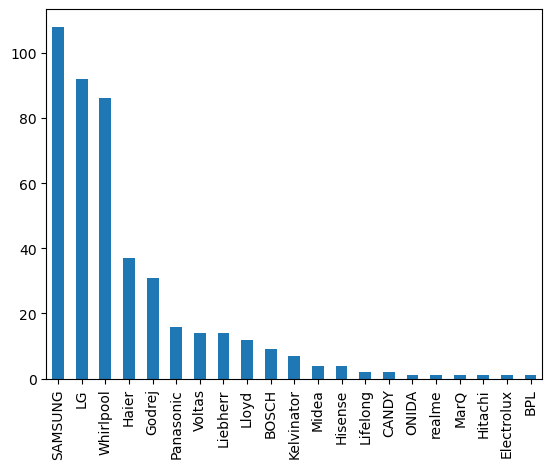

In [127]:
df["Brand"].value_counts().plot(kind="bar")

<Axes: xlabel='Cool_type', ylabel='count'>

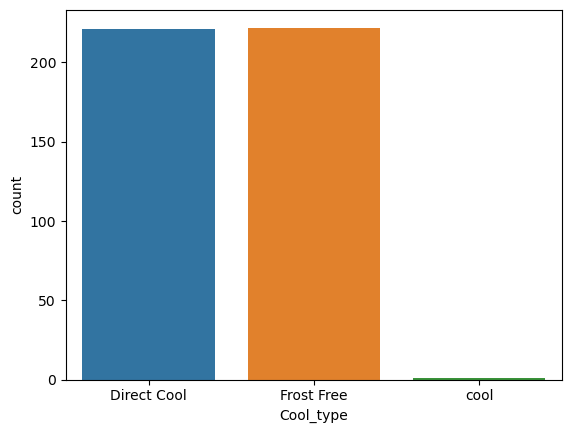

In [89]:
sns.countplot(data=df,x="Cool_type")

<Axes: xlabel='Star', ylabel='count'>

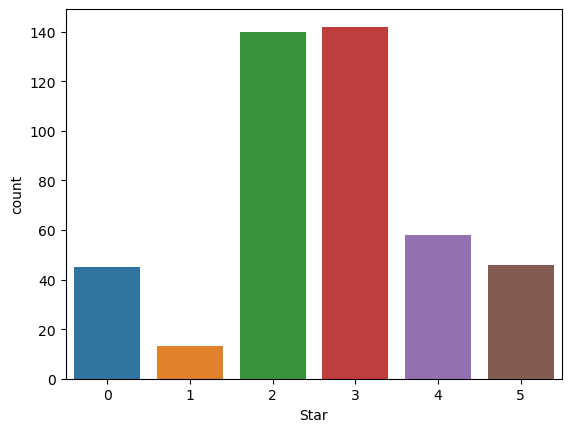

In [122]:
sns.countplot(data=df,x="Star")

<Axes: xlabel='Liter_storage', ylabel='Brand'>

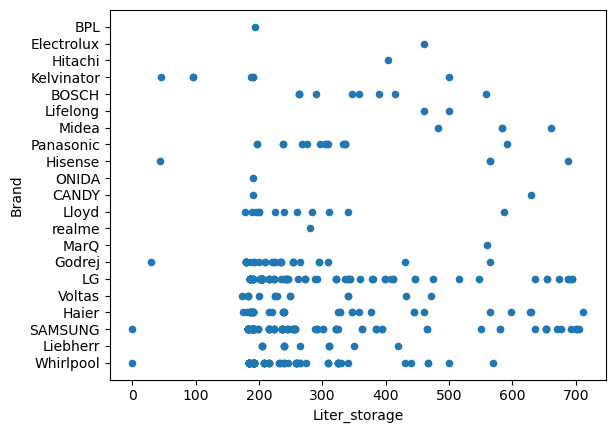

In [126]:
df.plot.scatter(x="Liter_storage",y="Brand")